# 1. Imports

In [35]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

import random

# 2. Loading Dataset

In [89]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

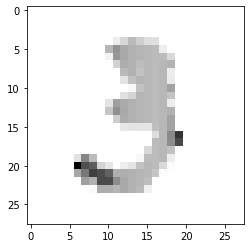

In [91]:
plt.imshow(x_train[10], cmap='binary')
plt.show()

In [92]:
x_train[0].shape

(28, 28)

# 3. Model

### 3.1 Building

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

In [94]:
model = Sequential()

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2 Training

In [96]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 822us/step - loss: 0.0543 - accuracy: 0.9827
Epoch 2/3
1875/1875 [==============================] - 2s 823us/step - loss: 0.0389 - accuracy: 0.9875
Epoch 3/3
1875/1875 [==============================] - 2s 824us/step - loss: 0.0315 - accuracy: 0.9902


In [98]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 622us/step - loss: 0.1018 - accuracy: 0.9721
0.1017628088593483 0.972100019454956


### 3.3 Predictions

In [99]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 545us/step


<function matplotlib.pyplot.show(close=None, block=None)>

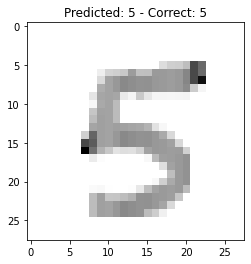

In [193]:
i = random.randint(0, 10001)

title = f'Predicted: {str(np.argmax(predictions[i]))}' + f' - Correct: {str(y_test[i])}'

plt.imshow(x_test[i], cmap='binary')
plt.title(title)
plt.show

# 4. Model2

### 4.1 Building

In [101]:
x_train2 = np.expand_dims(x_train, axis=-1)
x_train2.shape

(60000, 28, 28, 1)

In [197]:
model2 = Sequential()

model2.add(Conv2D(7, (3,3), activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(7, (3,3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 4.2 Training

In [198]:
model2.fit(x_train2, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2539 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0853 - accuracy: 0.9755
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0556 - accuracy: 0.9832


In [199]:
val_loss, val_acc = model2.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9833
0.05127204582095146 0.983299970626831


### 4.3 Predictions

In [200]:
predictions2 = model.predict([x_test])

313/313 [==============================] - 0s 561us/step


<function matplotlib.pyplot.show(close=None, block=None)>

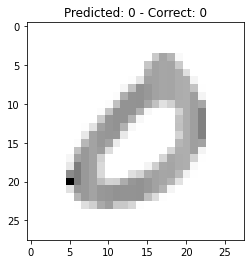

In [202]:
i = random.randint(0, 10001)

title = f'Predicted: {str(np.argmax(predictions2[i]))}' + f' - Correct: {str(y_test[i])}'

plt.imshow(x_test[i], cmap='binary')
plt.title(title)
plt.show

### 4.4 Wrong Predictions

<function matplotlib.pyplot.show(close=None, block=None)>

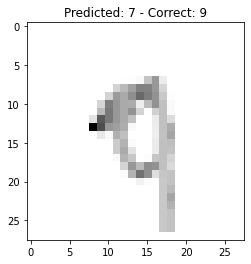

In [209]:
#i = random.randint(0, 10001)
wrong = []

for i in range(len(predictions2)):
    if np.argmax(predictions2[i]) != y_test[i]:
        wrong.append(i)
        
i = wrong[random.randint(0 ,len(wrong))]
        
title = f'Predicted: {str(np.argmax(predictions2[i]))}' + f' - Correct: {str(y_test[i])}'

plt.imshow(x_test[i], cmap='binary')
plt.title(title)
plt.show